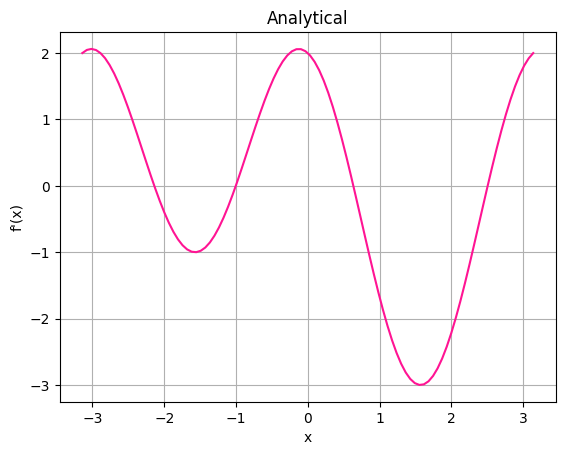

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100)
h = 0.1 

def f(x):
    return np.cos(x) + np.sin(2 * x)

def fd(x):
    return -np.sin(x) + 2 * np.cos(2 * x)

fd = fd(x)

plt.figure()
plt.plot(x, fd, color = 'deeppink')
plt.title("Analytical")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.show()

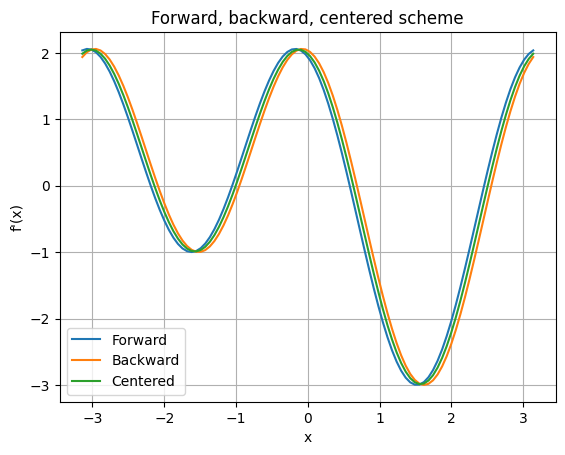

In [11]:
def forward(f, x, h):
    return (f(x + h) - f(x)) / h

def backward(f, x, h):
    return (f(x) - f(x - h)) / h

def centered(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

fo = forward(f, x, h)
ba = backward(f, x, h)
ce = centered(f, x, h)

plt.figure()
plt.plot(x, fo, label="Forward")
plt.plot(x, ba, label="Backward")
plt.plot(x, ce, label="Centered")
plt.legend()
plt.title("Forward, backward, centered scheme")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.show()

The three curves follow each other closely but show slight difference. Since the forward method use future points to estimate, it is slightly ahead of the other two. Similarly, the backward method lies furthest to the right of the graph, and the centered method lies in the middle.

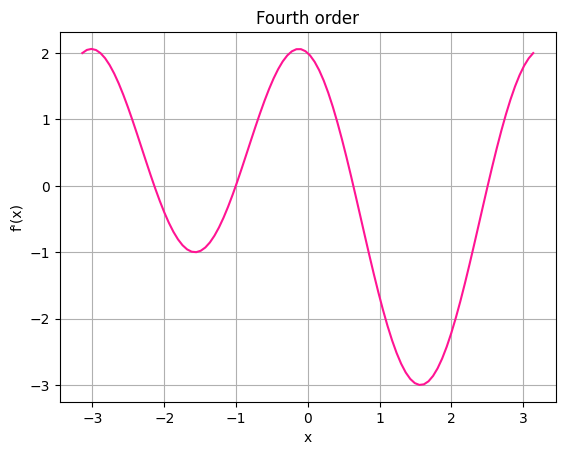

In [3]:
def fourth(f, x, h):
    return (4/3) * ((f(x + h) - f(x - h)) / (2 * h)) - (1/3) * ((f(x + 2 * h) - f(x - 2 * h)) / (4 * h))

fourth = fourth(f, x, h)

plt.figure()
plt.plot(x, fourth, color='deeppink')
plt.title("Fourth order")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.grid(True)
plt.show()

The overall curve follows exactly like the analytical one.

I let the analytical values subtract the values of each method to find the errors.

In [5]:
ef = np.abs(fd - fo)
eb = np.abs(fd - ba)
ec = np.abs(fd - ce)

print("Exact values\t\tForward Error\tBackward Error\tCentered Error")
for i in range(0, len(x), 10):
    print(f"{x[i]:.6f}\t\t{ef[i]:.5f}\t\t{eb[i]:.5f}\t\t{ec[i]:.5f}")

Exact values		Forward Error	Backward Error	Centered Error
-3.141593		0.03665		0.06327		0.01331
-2.506927		0.15505		0.14518		0.00494
-1.872262		0.08883		0.10757		0.00937
-1.237597		0.11577		0.09799		0.00889
-0.602932		0.13936		0.15075		0.00569
0.031733		0.07580		0.04935		0.01323
0.666398		0.23509		0.23088		0.00211
1.301064		0.10268		0.12873		0.01302
1.935729		0.16221		0.13927		0.01147
2.570394		0.21872		0.22798		0.00463


The centered method has the smallest errors, followed by the forward method and backward method.

In [7]:
efo = np.abs(fd - fourth)

print("\nExact values\t\tFourth Order Error")
for i in range(0, len(x), 10):
    print(f"{x[i]:.6f}\t\t{efo[i]:.6f}")


Exact values		Fourth Order Error
-3.141593		0.000106
-2.506927		0.000033
-1.872262		0.000084
-1.237597		0.000080
-0.602932		0.000040
0.031733		0.000106
0.666398		0.000023
1.301064		0.000094
1.935729		0.000082
2.570394		0.000042


Compared to three methods above, this one's errors is the smallest, making it the most accurate method.

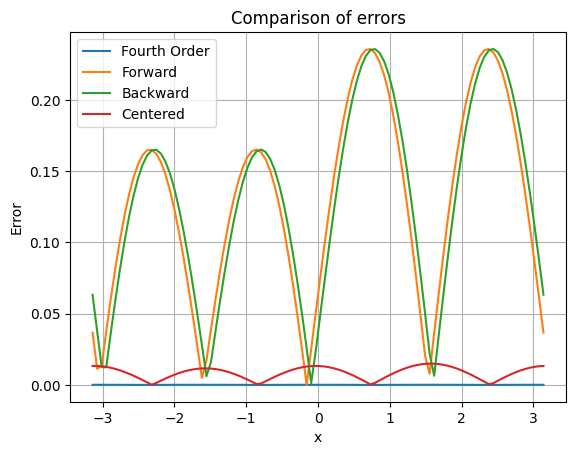

In [8]:
plt.plot(x, efo, label="Fourth Order")
plt.plot(x, ef, label="Forward")
plt.plot(x, eb, label="Backward")
plt.plot(x, ec, label="Centered")

plt.title("Comparison of errors")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()

The error values above is the difference between the true value and the approximated value at a single point. It only shows the deviation at a single point, which not give a full picture of the model across the entire dataset. To have a more overall view of all models, root mean squared error is better since it calculates the overall error by averaging the squared differences, which helps spot major errors and give a clearer view.

The goal is to observe how the RMSE of each method changes with varying step sizes h, then I can conclude their accuracy. I define the range of h from 10e-6 to 10e-1.

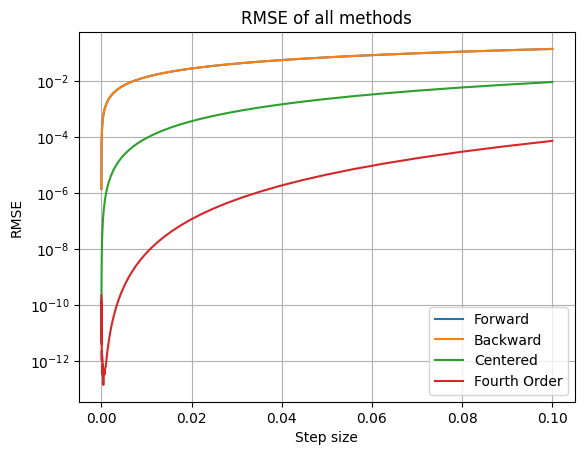

In [34]:
fd_values = fd(x)

def calculate_rmse(true_values, approx_values):
    return np.sqrt(np.mean((true_values - approx_values) ** 2))

h_values = np.logspace(-6, -1, 100)

rmse_for = []
rmse_b = []
rmse_c = []
rmse_fou = []

for h in h_values:
    fo = forward(f, x, h)
    ba = backward(f, x, h)
    ce = centered(f, x, h)
    fou = fourth(f, x, h)

    rmse_for.append(calculate_rmse(fd_values, fo))
    rmse_b.append(calculate_rmse(fd_values, ba))
    rmse_c.append(calculate_rmse(fd_values, ce))
    rmse_fou.append(calculate_rmse(fd_values, fou))

plt.figure()
plt.plot(h_values, rmse_for, label='Forward')
plt.plot(h_values, rmse_b, label='Backward')
plt.plot(h_values, rmse_c, label='Centered')
plt.plot(h_values, rmse_fou, label='Fourth Order')
plt.xlabel('Step size')
plt.ylabel('RMSE')
plt.yscale('log')
plt.title('RMSE of all methods')
plt.legend()
plt.grid(True)
plt.show()

The fourth order method has the lowest RMSE across all step sizes, but for very small h, there is a slight increase of RMSE due to round-off errors. The centered method has lower errors than the forward and backward but less accurate compared to the fourth-order. The forward and backward method have the highest errors, and as h decrease, they show limited improvement, making them the least accurate methods.